# Image Classification With A Deep Neural Network
This notebook details the steps taken to implement and train a Deep Neural Network(DNN) on the [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) dataset in order to perform the computer vision task of image classification on the FashionMNIST test dataset partition. 

To build, train and test a neural network, the libraries TensorFlow and Keras are leveraged to provide the features and methods required to build the components of a neural network. Supporting libraries such as Pandas, Matplotlib and Numpy are utlised for visualisation and data processing

**[TensorFlow](https://www.tensorflow.org/)**: An open-source platform for implementing, training, and deploying machine learning models.

**[Keras](https://keras.io/)**: An open-source library used to implement neural network architectures that run on both CPUs and GPUs.

**[Matplotlib](https://matplotlib.org/)**: Tool utilized to create visualization plots in Python such as charts, graphs and more

**[Numpy](https://numpy.org/)**: Enables several mathematical computations and operations of array data structures.

In [16]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import os
import time

## FashionMNIST

The [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset consists of images of clothing (T-shirts, Trousers, Dresses and more) that originate from Zalando’s image directory. Zalando is a European e-commerce company founded in 2008.

The researchers in Zalando have created the Fashion-MNIST dataset that contains 70,000 images of clothing. More specifically, it contains 60,000 training examples and 10,000 testing examples, that are all grayscale images with the dimension 28 x 28 categorized into 10 classes.

[**Keras Dataset**](https://keras.io/api/datasets/) (keras.datasets)

In the practical world of machine learning, obtaining dataset is costly in terms of time, money and effort.
But a few introductory datasets have been collated together to help students and researchers build and analyse the performance of models on specifics datasets.
Some of these dataset reside within the Keras API and are easily accessible through the [load_data()](https://keras.io/api/datasets/fashion_mnist/#load_data-function) method of each respective dataset.

To load the FashionMNIST: `keras.datasets.fashion_mnist.load_data()`

**Classes**
| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

**Dataset Partitions**

For this particular classification task, 55,000 training images, 10,000 test images, and 5,000 validation images are utilized.
- Training Data: This is the group of our dataset used to train the neural network directly. Training data refers to the dataset partition exposed to the neural network during training.
- Validation Data: This group of the dataset is utilized during training to assess the performance of the network at various iterations.
- Test Data: This partition of the dataset evaluates the performance of our network after the completion of the training phase.

The validation partition of the dataset is obtained from taking a slice of the training data. More specifically, the first 5000 training images and labels are assigned to the validation data.
The new training data is reassigned to every training data element but the first 5000 images in the original training data.

In [17]:
# Load Dataset and split into partitions
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Create a validation set from training images
validation_images = train_images[:5000]
validation_labels = train_labels[:5000]

# Re-assign the training images and labels
train_images, train_labels = train_images[5000:], train_labels[5000:]

## Analysing the dataset

As mentioned earlier the FashionMNIST dataset contains 70,000 grayscale images with the dimensions 28 x 28.
Below are the several methods to leverage in order to confirm the nunbers of elements within the dataset partitions.

* Using Numpy's array [shape attribute](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html#numpy.ndarray.shape). This is possbile as the `train_images`, `train_labels`, `test_images` etc, are all numpy arrays
    
* Using Python's [length method](https://www.w3schools.com/python/ref_func_len.asp) 

In [18]:
# Analyze the stuctural properties of the training dataset
print("Shape of training images", train_images.shape)
print("Shape of training labels", train_labels.shape)
print("\n")

# Alternatively you can use the Python len() method
print("Number of training images", len(train_images))
print("Number of training labels", len(train_labels))
print("\n")

# Analyze the stuctural properties of the test dataset
print("Shape of test images", test_images.shape)
print("Shape of test labels", test_labels.shape)
print("\n")

# Alternatively you can use the Python len() method
print("Number of test images", len(test_images))
print("Number of test labels", len(test_labels))

Shape of training images (55000, 28, 28)
Shape of training labels (55000,)


Number of training images 55000
Number of training labels 55000


Shape of test images (10000, 28, 28)
Shape of test labels (10000,)


Number of test images 10000
Number of test labels 10000


The FashionMNIST dataset labels range from the numbers 0-9. The cell below shows the values of three randomly chosen labels from training dataset.

And by the built in Numpy array methods `max()` and min `min()` it is possible to confirm the maximum and minimum label expected from the training dataset.

In [19]:
# Example of training label content
print(train_labels[0], train_labels[43], train_labels[1923])
print("Minimum value of training labels", train_labels.min())
print("Maximum value of training labels", train_labels.max())

4 2 1
Minimum value of training labels 0
Maximum value of training labels 9


It is also possible to observe the content of an element of the training dataset, or any other elements of the dataset by using the Python's list subscript.

`print(train_images[0])` prints to the console a numpy multidimensional array containing values between the numbers 0-255.

In [20]:
# Content of training images before normalisation
print(train_images[0])
print("Minimum value of pixel training images", train_images.min())
print("Maximum value of pixel training images", train_images.max())

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  44 127 182 185 161 120  55
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  42 198 251 255 251 249 247 255 252
  214 100   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 233 252 237 239 234 237 235 237 237
  254 227   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   2   0   0  16 210 225 215 175 217 216 193 196 226
  221 209  50   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 199 229 232 230 245 204 219 253 245 207 194
  223 231 236 235   0   0   3   0   0   0]
 [  0   0   0   0   1   0 137 235 204 209 201 209 234 190 234 218 215 238
  239 204 189 224 154   0   0   0   0   0]
 [  0   0   0   0   0   0 194 201 200 209 202 193 205 194 183 218 231 197
  172 181 193 205 199   0   0   0   0   0]
 [  0   0   0   0   0   3 212 203 188 189 196 198 198 201 196 21

## Normalisation

Before we proceed, we have to normalize the training image pixel values to values within the range 0 and 1. This is done by dividing each pixel value within the train and test images by 255 as this is the largest pixel value within the images (go back to previous cell for verfification).

Normalising the pixel values to numbers between 0 and 1 is not compulsury, but is a step advised to be taken when working with image dataset as large pixel values tend to prolong the training time, or time it takes for the network to converge. 

This is due to the fact that weights within the neural network take on really small values and conducting matrix multiplcation between the small values of the weights and large values of normal pixels will result in larger outputs, which increases the time taken for the network to train or converge.

Refer to [01_implementing_DNN](https://resources.oreilly.com/binderhub/practical-introduction-to-the-world-of-computer-vision-and-deep-learning/blob/master/notebooks/01_implementing_DNN.ipynb) notebook for example on viewing neural network weigths.


In [21]:
# Normalise training, test and validation images
train_images = train_images / 255.0
test_images = test_images / 255.0
validation_images = validation_images / 255.0

Observing the contents of an element of the training data will display pixels values ranging from 0 to 1, the cell below demonstrates this.

In [23]:
# Content of training images after normalisation
print(train_images[0])
print("Minimum value of training images", train_images.min())
print("Maximum value of training images", train_images.max())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.17254902
  0.49803922 0.71372549 0.7254902  0.63137255 0.47058824 0.21568627
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.16470588 0.77647059 0.98431373
  1.         0.98431373 0.97647059 0.96862745 1.         0.98823529
  0.83921569 0.39215686 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.         0.         0.91372549 0

## Visualising FashionMNIST

The values of the dataset label correspond to item of clothings. In order to train neural networks it's practical to represent classes using integers, as opposed to their corresponding character representation, this is called Integer Encoding, as we are assigning each unique class to a integer representation.

In the following cells below the first 20 training image labels are obtained and the correpsonding textual representation of the integer is printed aswell. 

In [27]:
fashion_mnist_class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in range(20):
    print("Label value:", train_labels[i], "Label text:", fashion_mnist_class_names[train_labels[i]])

Label value: 4 Label text: Coat
Label value: 0 Label text: T-shirt/top
Label value: 7 Label text: Sneaker
Label value: 9 Label text: Ankle boot
Label value: 9 Label text: Ankle boot
Label value: 9 Label text: Ankle boot
Label value: 4 Label text: Coat
Label value: 4 Label text: Coat
Label value: 3 Label text: Dress
Label value: 4 Label text: Coat
Label value: 0 Label text: T-shirt/top
Label value: 1 Label text: Trouser
Label value: 8 Label text: Bag
Label value: 6 Label text: Shirt
Label value: 3 Label text: Dress
Label value: 6 Label text: Shirt
Label value: 4 Label text: Coat
Label value: 3 Label text: Dress
Label value: 2 Label text: Pullover
Label value: 8 Label text: Bag


Visualising the clothing item within the first 20 training images is a way to verify the first 20 training images integer encoding coreresponds to their textual representation.

Matplotlib's [pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) to generate figures that contain the images of the first 20 data points of the training data. The key method used for visualising image is pyplot [imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib.pyplot.imshow) method.

In the cell below we iterate through the first 20 data points of the trianing data and display both the image and the textual reprsentation of the integer encoding of the associated class. And you can verify by observation that the class names corresponds to the content of the image.

Now we can build our neural network!

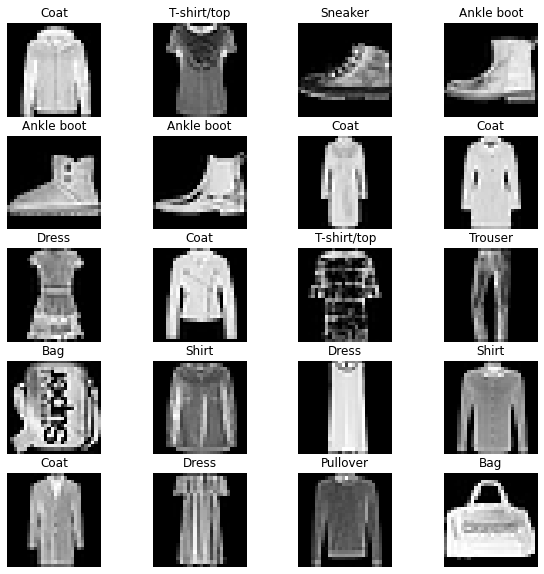

In [29]:
# Visualising data
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.axis("off")
    plt.title(fashion_mnist_class_names[train_labels[i]])
    plt.imshow(train_images[i], cmap='gray', vmin=0, vmax=1)
plt.show()

## Neural Network Implementation

The neural network implmented is a simple deep neural network with an input layers, three hidden layers and an output layer.

In feed forward neural networks the number of units reduces as we move down the layers towards the output layer, for several reasons, mainly due to the fact that you require more neurons to process inputs in the earlier layers and the last layer corresponds to the number of classes required for classificaiton, in the case of the fashionMNIST dataset this will be 10. 

Also, it's has been discovered by reasearchers that there's no additional benefit to performance or accuracy gained by increasing the number of neurons within layers, therefore leveraging high number of neurons within layers will lead to high computational cost at no additional gain.

**Note: For detailed explanation on the components of a neural network, please refer to [01_implementing_DNN](https://resources.oreilly.com/binderhub/practical-introduction-to-the-world-of-computer-vision-and-deep-learning/blob/master/notebooks/01_implementing_DNN.ipynb)**

In [30]:
# Classification MLP(Multilayer perceptron) with three hidden layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation=keras.activations.relu),
    keras.layers.Dense(250, activation=keras.activations.relu),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

2021-09-21 23:26:28.110101: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-21 23:26:28.113054: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


## Neural Network Structural Information

A structural summary of the neural network implemented above is obtainable by calling our model's 'summary' method. By calling the summary method, we gain information on the model properties such as layers, layer type, shapes, number of weights in the model, and layers.

[Keras documentation reference](https://keras.io/api/models/model/#summary-method)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


## Neural Network Hyperparameters and More
### Compilation
Keras provides the ‘compile’ method through the model object we have instantiated earlier. The compile function enables the actual building of the model we have implemented behind the scene with some additional characteristics such as the loss function, optimizer, and metrics.
To train the network, we utilize a loss function that calculates the difference between the predicted values provided by the network and actual values of the training data.

The loss values accompanied by an optimizer algorithm facilitates the number of changes made to the weights within the network. Supporting factors such as momentum and learning rate schedule, provide the ideal environment to enable the network training to converge, herby getting the loss values as close to zero as possible.

Definitions
Learning Rate is an integral component of a neural network as it’s a factor value that determines the level of updates that are made to the values of the weights of the network.
In a visualization exercise, the function to be solved can be depicted as a hyperbolic curve in n-dimensional parameter space.
The learning rate is a component that affects the step size that the current parameter values take towards a local/global minima; hence the learning rate directly affects the rate of convergence of a network during training. If the learning rate is too small the network might take several iterations and epochs to converge. On the other hand, if the learning rate is too high, there is a risk of overshooting the minima, and as a result of this our training doesn’t converge. Selecting the appropriate learning rate can be a time staking exercise.
Learning rate schedule: A constant learning rate can be utilized during the training of a neural network, but this can increase the amount of training that has to take place to arrive at optimal neural network performance. By utilizing the learning rate schedule, we introduce a timely reduction or increment of the learning rate during training to arrive at an optimal training outcome of the neural network.
Learning rate Decay: Learning rate decay reduces the oscillations of steps taken towards a local minimum during gradient descent. By reducing the learning rate to a smaller value compares to the learning rate value utilized at the start of the training, we can steer the network towards a solution that oscillates in smaller ranges around a minimum.
Loss Function: This is a method that quantifies ‘how well’ a machine learning model performs. The quantification is an output(cost) based on a set of inputs, which are referred to as parameter values. The parameter values are used to estimate a prediction, and the ‘loss’ is the difference between the prediction and the actual values.
Optimizer: An optimizer within a neural network is an algorithmic implementation that facilitates the process of gradient descent within a neural network by minimizing the loss values provided via the loss function. To minimize the loss, it is paramount the values of the weights within the network are selected appropriately.

In [ ]:
# Model compilation and initialisation of optimizer
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

## TensorBoard

TensorBoard provides visual insights into the events that occur during training at each epoch.
The training visualization provided by TensorBoard is stored in a ‘runs’ folder directory. We create a function to generate a folder directory and identify each log via a timestamp.

**Run Tensorboard using the command below from the location of the run folder on the terminal**
`tensorboard --logdir='runs'`


In [ ]:
# Configure TensorBoard storage location
root_logdir = os.path.join(os.curdir, "runs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

## Training the Neural Network

The Model’s functional API ‘fit’ method provides the tools to train the implemented network.
Passing specific arguments into the fit function:
we can specify the training data used for training
the number of epochs we are to train the network for
and also validation dataset to be used to validate the performance of the network during training to unseen data.
We’ll also utilize the ‘callbacks’ argument, which in this instance, calls the TensorBoard callback created.
The default batch size within Keras when training a neural network is 32. The network is trained for a total of 60 epochs. With the utilization of early stopping, a halt to training is made once no improvement in the validation loss is recorded after 3 epochs. Early stopping can save you hours, especially in the scenario where your network begins to overfit and stops converging.
In summary, we train the model for a maximum of 60 epochs, where we feed forward all our training data in batches of 32 (batch size) through the network at each epoch.
An update is made to our network’s weights parameters after it’s seen 32 training images and labels.
The ‘fit’ method takes additional arguments that are in the official Keras documentation.

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
# Train model
model.fit(train_images, train_labels, epochs=60, validation_data=(validation_images, validation_labels), callbacks=[tensorboard_cb, early_stopping_cb])

## Evalating the Model
To evaluate a model requires feed-forwarding through the network data that hasn’t been exposed to the network during training.
Evaluation of the model before actual utilization is a good indicator of observing how well the model can generalize to unseen data.
With the evaluation results, you can decide either to fine-tune the network hyperparameters or move forward to production after observing the accuracy of the evaluation over the test dataset.

In [ ]:
model_evaluation_results = model.evaluate(test_images, test_labels, verbose=2)
print("The test loss is", model_evaluation_results[0])
print("The test accuracy is", model_evaluation_results[1])

In [ ]:
# Prediction on test images using model.predict() method
practical_test_images =  test_images[:10]
prediction_probabilites = model.predict(practical_test_images)
prediction_probabilites

In [ ]:
# Altertive 1: Clean up model prediction using argmax to find the largest probablity
def derive_predicted_classes(prediction_probabilites):
    batch_prediction = []
    for vector in prediction_probabilites:
        batch_prediction.append(np.argmax(vector))
    return batch_prediction
    
model_prediction = derive_predicted_classes(prediction_probabilites)
model_prediction


In [ ]:
# Altertive 2: Get specific model preiction using the model.predict_classes() method
model_prediction = model.predict_classes(practical_test_images)
model_prediction

In [ ]:
np.array(fashion_mnist_class_names)[model_prediction]

In [ ]:
# Visualise the prediction result
plt.figure(figsize=(10,10))
for i in range(len(practical_test_images)):
    plt.subplot(5,5, i+1)
    plt.axis("off")
    plt.grid(False)
    plt.imshow(practical_test_images[i])
    plt.title(fashion_mnist_class_names[model_prediction[i]])
plt.show()

In [ ]:
model.save("image_classification_model.h5")

In [ ]:
# NOTE: If you encounter the error "AttributeError: 'str' object has no attribute 'decode'" when trying to load the model
# this is caused by using an higher version of h5py. Simply downgrade the package version of h5py.
# using pip "pip install 'h5py==2.10.0' --force-reinstall"
# or using conda "conda install -c anaconda h5py=2.10.0"
# reference: https://stackoverflow.com/questions/53740577/does-any-one-got-attributeerror-str-object-has-no-attribute-decode-whi

loaded_model = keras.models.load_model("image_classification_model.h5")
predictions = loaded_model.predict_classes(practical_test_images)
print(predictions)
print(np.array(fashion_mnist_class_names)[predictions])